In [1]:
# Name: Pallavi Gautam Sonawane
# PRN No.: 220380728003
# Assignment 2.2: Use iris dataset and create a classification model using Gaussian naïve bayes classifier. Compare the result of Naïve bayes Classifier with the Decision tree classifier.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Iris.csv")

In [3]:
data.head(151)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.shape # it shows 150 Row & 5 Column present in IRis dataset

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe() # gives statistical information of dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


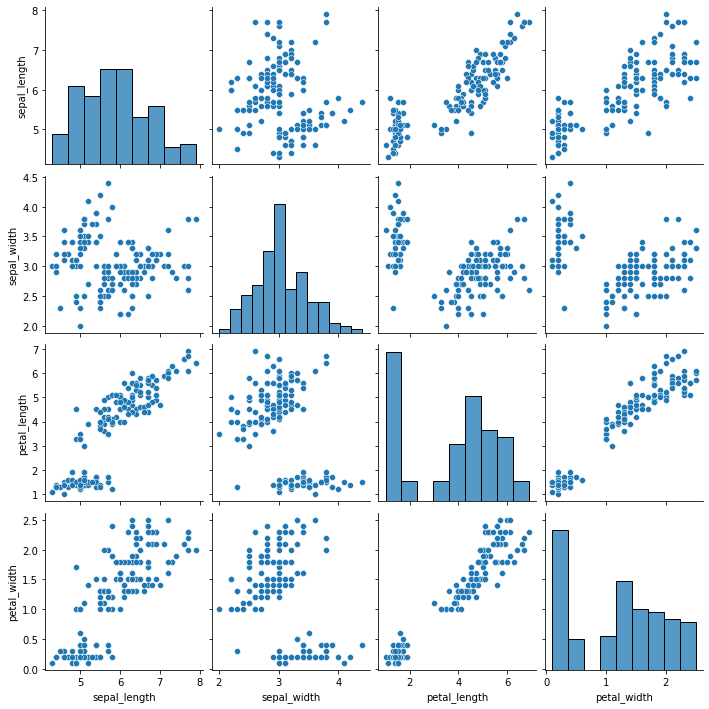

In [7]:
# pair plot
sns.pairplot(data)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [9]:
x=data[['sepal_length','sepal_width','petal_length','petal_width']]

In [10]:
y=data['species']

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =4)

In [13]:
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred  =  classifier.predict(x_test)
y_pred

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [15]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [17]:
model = GaussianNB().fit(x_train, y_train) #fitting our model

In [18]:
y_pred = model.predict(x_test)

In [19]:
ac = accuracy_score(y_test, y_pred) 
print (ac)

0.9666666666666667


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf=DecisionTreeClassifier(random_state=0,criterion="gini")
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
96.66666666666667


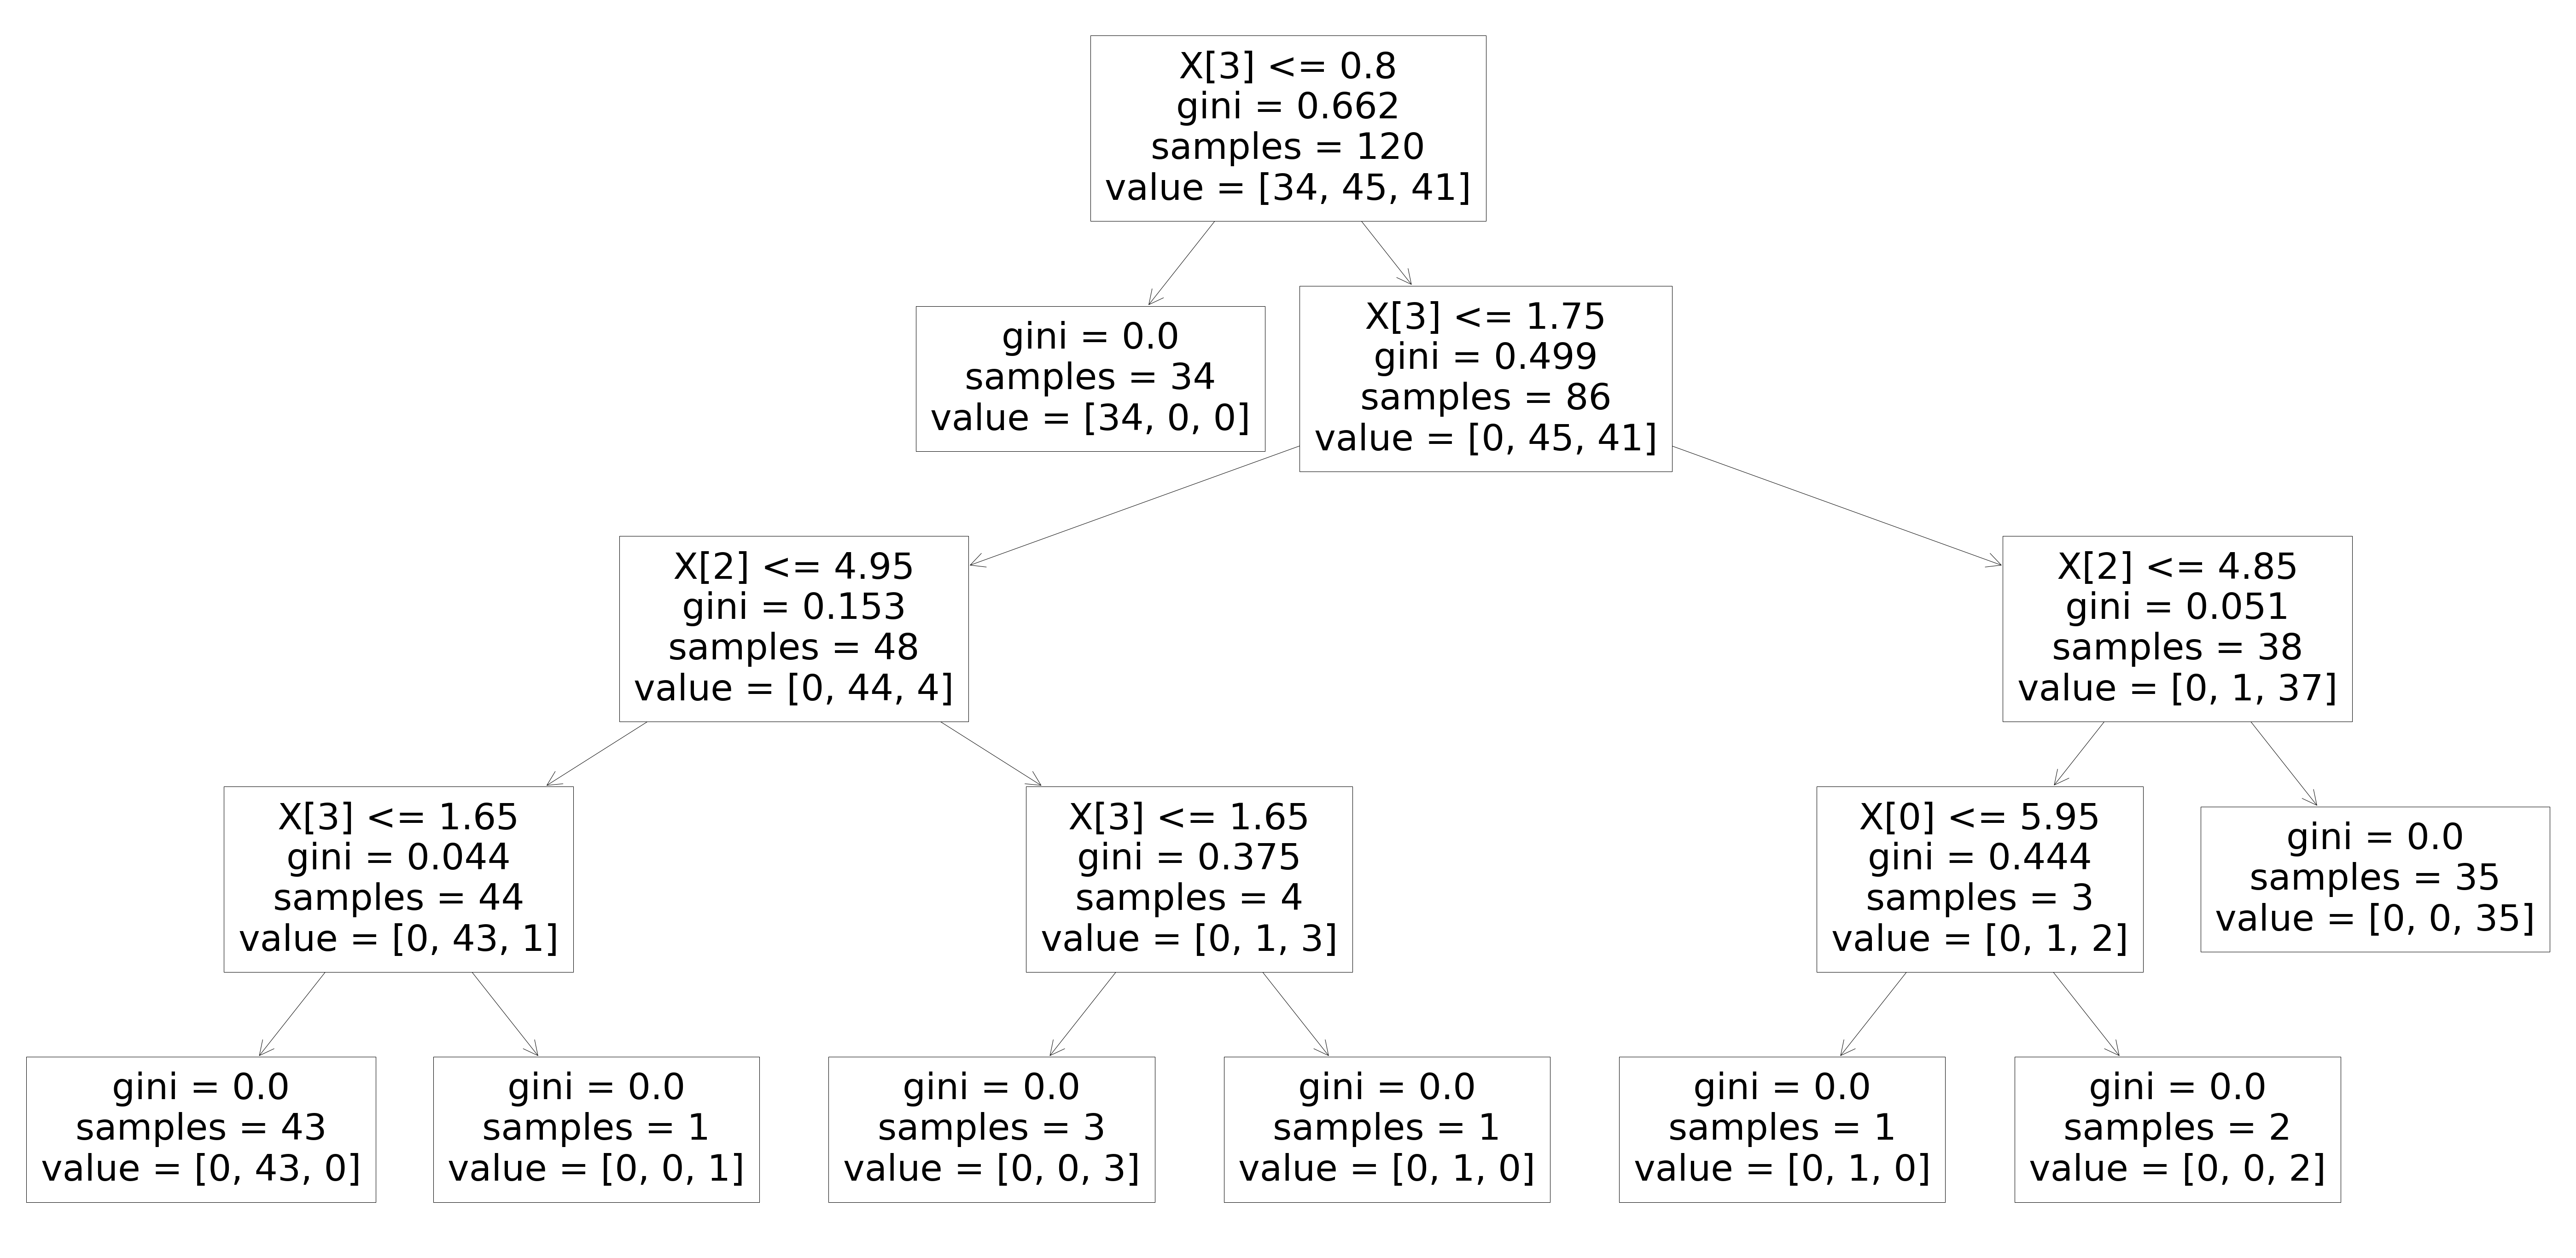

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(clf.fit(x_train, y_train))
plt.show()